# 1 часть

In [1]:
import numpy as np
import math
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
import matplotlib.pyplot as plt

# 1.3

In [2]:
df = pd.read_csv('housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


1) Разбиение датасета на тренировочную, валидационную и тестовую выборки

In [4]:
train_validation, test = train_test_split(df, test_size=0.3)
train, validation = train_test_split(train_validation, test_size = 0.5)

2) преобразование категориального признака ocean_proximity через кодировку Dummy

In [5]:
train = pd.get_dummies(train, columns=['ocean_proximity'])
test = pd.get_dummies(test, columns=['ocean_proximity'])
validation = pd.get_dummies(validation, columns=['ocean_proximity'])

In [6]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
20283,-119.18,34.18,31.0,2636.0,638.0,2695.0,614.0,3.2196,175800.0,0,0,0,0,1
4713,-118.36,34.06,52.0,2130.0,455.0,921.0,395.0,2.9605,500001.0,1,0,0,0,0
4492,-118.22,34.06,52.0,48.0,6.0,41.0,10.0,10.2264,112500.0,1,0,0,0,0
11912,-117.44,33.96,29.0,124.0,22.0,50.0,18.0,12.5381,112500.0,0,1,0,0,0
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,0,1,0,0,0


3) Замена признаков total_rooms и total_bedrooms на average_* путем деления на households

In [7]:
train['total_rooms'] /= train['households']
train['total_bedrooms'] /= train['households']
train.rename(columns={'total_rooms':'average_rooms', 'total_bedrooms':'average_bedrooms'}, inplace=True)

In [8]:
test['total_rooms'] /= test['households']
test['total_bedrooms'] /= test['households']
test.rename(columns={'total_rooms':'average_rooms', 'total_bedrooms':'average_bedrooms'}, inplace=True)

In [9]:
validation['total_rooms'] /= validation['households']
validation['total_bedrooms'] /= validation['households']
validation.rename(columns={'total_rooms':'average_rooms', 'total_bedrooms':'average_bedrooms'}, inplace=True)

In [10]:
train.head()

,longitude,latitude,housing_median_age,average_rooms,average_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
20283,-119.18,34.18,31.0,4.293160,1.039088,2695.0,614.0,3.2196,175800.0,0,0,0,0,1
4713,-118.36,34.06,52.0,5.392405,1.151899,921.0,395.0,2.9605,500001.0,1,0,0,0,0
4492,-118.22,34.06,52.0,4.800000,0.600000,41.0,10.0,10.2264,112500.0,1,0,0,0,0
11912,-117.44,33.96,29.0,6.888889,1.222222,50.0,18.0,12.5381,112500.0,0,1,0,0,0
2908,-119.04,35.37,44.0,5.393333,1.033333,667.0,300.0,2.8750,82700.0,0,1,0,0,0


In [11]:
test.head()

,longitude,latitude,housing_median_age,average_rooms,average_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
17145,-122.18,37.44,44.0,6.465318,1.002890,948.0,346.0,8.2436,500001.0,0,0,0,1
8642,-118.43,33.86,34.0,4.261905,1.035714,162.0,84.0,7.1264,500001.0,0,0,0,1
16193,-121.30,37.96,52.0,5.673077,0.915385,736.0,260.0,3.6591,105100.0,0,1,0,0
6062,-117.84,34.00,26.0,6.991228,1.026316,383.0,114.0,6.8758,253800.0,1,0,0,0
12754,-121.37,38.61,39.0,5.715278,1.013889,329.0,144.0,3.0833,114100.0,0,1,0,0


In [12]:
validation.head()

,longitude,latitude,housing_median_age,average_rooms,average_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
1634,-122.20,37.89,37.0,7.506770,1.083172,1315.0,517.0,7.3195,367500.0,0,0,0,1,0
6437,-118.02,34.10,36.0,5.239130,0.980978,1008.0,368.0,4.7330,233700.0,0,1,0,0,0
20415,-118.84,34.17,16.0,4.226716,1.004902,1877.0,816.0,3.2176,187500.0,1,0,0,0,0
2952,-119.01,35.34,44.0,6.223022,1.233813,782.0,278.0,3.0208,63700.0,0,1,0,0,0
834,-122.02,37.60,32.0,3.948171,0.899390,1097.0,328.0,3.2386,149600.0,0,0,0,1,0


4) Определение кол-ва отсутствующих значений и их удаление

In [13]:
print('train: ',train['average_bedrooms'].isnull().sum())
print('validation: ',validation['average_bedrooms'].isnull().sum())
print('test: ',test['average_bedrooms'].isnull().sum())

train:  64
validation:  78
test:  65


In [14]:
train_no_null = train.dropna(axis=0)
print(train_no_null.isnull().sum())

longitude                     0
latitude                      0
housing_median_age            0
average_rooms                 0
average_bedrooms              0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity_<1H OCEAN     0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64


In [15]:
X_train, y_train = train_no_null[['average_rooms']], train_no_null['average_bedrooms']
# print(type(train_no_null['average_rooms']))
# print(type(train_no_null[['average_rooms']]))

In [16]:
clf = LinearRegression().fit(X_train, y_train)
predictions = clf.predict(X_train)
print('RMSE: {}'.format(np.sqrt(MSE(y_train, predictions))))

RMSE: 0.23799422215347582


In [17]:
train_nan_bedrooms = train['average_bedrooms'].isnull()
train_nan_rooms = train.loc[train_nan_bedrooms, ['average_rooms']]
train.loc[train_nan_bedrooms, 'average_bedrooms'] = clf.predict((train_nan_rooms))
print(train['average_bedrooms'].isnull().sum())

0


In [18]:
validation_nan_bedrooms = validation['average_bedrooms'].isnull()
validation_nan_rooms = validation.loc[validation_nan_bedrooms, ['average_rooms']]
validation.loc[validation_nan_bedrooms, 'average_bedrooms'] = clf.predict((validation_nan_rooms))
print(validation['average_bedrooms'].isnull().sum())

0


In [19]:
test_nan_bedrooms = test['average_bedrooms'].isnull()
test_nan_rooms = test.loc[test_nan_bedrooms, ['average_rooms']]
test.loc[test_nan_bedrooms, 'average_bedrooms'] = clf.predict((test_nan_rooms))
print(test['average_bedrooms'].isnull().sum())

0


5) Нормализация признаков longitude и latitude

In [20]:
train['longitude'] -= np.mean(train['longitude'])
train['longitude'] /= np.std(train['longitude'])
train['latitude'] -= np.mean(train['latitude'])
train['latitude'] /= np.std(train['latitude'])

In [21]:
validation['longitude'] -= np.mean(validation['longitude'])
validation['longitude'] /= np.std(validation['longitude'])
validation['latitude'] -= np.mean(validation['latitude'])
validation['latitude'] /= np.std(validation['latitude'])

In [22]:
test['longitude'] -= np.mean(test['longitude'])
test['longitude'] /= np.std(test['longitude'])
test['latitude'] -= np.mean(test['latitude'])
test['latitude'] /= np.std(test['latitude'])

In [23]:
train.head()

,longitude,latitude,housing_median_age,average_rooms,average_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
20283,0.209853,-0.687682,31.0,4.293160,1.039088,2695.0,614.0,3.2196,175800.0,0,0,0,0,1
4713,0.617782,-0.743630,52.0,5.392405,1.151899,921.0,395.0,2.9605,500001.0,1,0,0,0,0
4492,0.687429,-0.743630,52.0,4.800000,0.600000,41.0,10.0,10.2264,112500.0,1,0,0,0,0
11912,1.075459,-0.790253,29.0,6.888889,1.222222,50.0,18.0,12.5381,112500.0,0,1,0,0,0
2908,0.279500,-0.132867,44.0,5.393333,1.033333,667.0,300.0,2.8750,82700.0,0,1,0,0,0


In [24]:
print(train['longitude'].to_numpy().mean(axis = 0))
print(train['longitude'].to_numpy().std(axis = 0))
print(train['latitude'].to_numpy().mean(axis = 0))
print(train['latitude'].to_numpy().std(axis = 0))

5.673129002376946e-14
0.9999999999999938
-8.889652887319747e-15
0.9999999999999959


In [25]:
test.head()

,longitude,latitude,housing_median_age,average_rooms,average_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
17145,-1.303538,0.842089,44.0,6.465318,1.002890,948.0,346.0,8.2436,500001.0,0,0,0,1
8642,0.566435,-0.832323,34.0,4.261905,1.035714,162.0,84.0,7.1264,500001.0,0,0,0,1
16193,-0.864717,1.085300,52.0,5.673077,0.915385,736.0,260.0,3.6591,105100.0,0,1,0,0
6062,0.860644,-0.766843,26.0,6.991228,1.026316,383.0,114.0,6.8758,253800.0,1,0,0,0
12754,-0.899624,1.389314,39.0,5.715278,1.013889,329.0,144.0,3.0833,114100.0,0,1,0,0


In [26]:
print(test['longitude'].to_numpy().mean(axis = 0))
print(test['longitude'].to_numpy().std(axis = 0))
print(test['latitude'].to_numpy().mean(axis = 0))
print(test['latitude'].to_numpy().std(axis = 0))

2.1682053224326798e-13
0.9999999999999996
5.371700787311681e-14
1.0000000000000022


In [27]:
validation.head()

,longitude,latitude,housing_median_age,average_rooms,average_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
1634,-1.333130,1.076794,37.0,7.506770,1.083172,1315.0,517.0,7.3195,367500.0,0,0,0,1,0
6437,0.762434,-0.706992,36.0,5.239130,0.980978,1008.0,368.0,4.7330,233700.0,0,1,0,0,0
20415,0.351343,-0.674047,16.0,4.226716,1.004902,1877.0,816.0,3.2176,187500.0,1,0,0,0,0
2952,0.266116,-0.123379,44.0,6.223022,1.233813,782.0,278.0,3.0208,63700.0,0,1,0,0,0
834,-1.242890,0.940303,32.0,3.948171,0.899390,1097.0,328.0,3.2386,149600.0,0,0,0,1,0


In [28]:
print(validation['longitude'].to_numpy().mean(axis = 0))
print(validation['longitude'].to_numpy().std(axis = 0))
print(validation['latitude'].to_numpy().mean(axis = 0))
print(validation['latitude'].to_numpy().std(axis = 0))

6.831596934517376e-14
0.9999999999999989
6.281575481254574e-14
1.0000000000000007


# 2 часть

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 2.1.

In [30]:
df = pd.read_csv('Davis.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

In [31]:
df.head()

,sex,weight,height,repwt,repht
0,M,77,182,77.0,180.0
1,F,58,161,51.0,159.0
2,F,53,161,54.0,158.0
3,M,68,177,70.0,175.0
4,F,59,157,59.0,155.0


In [32]:
train, test = train_test_split(df, test_size=0.5)

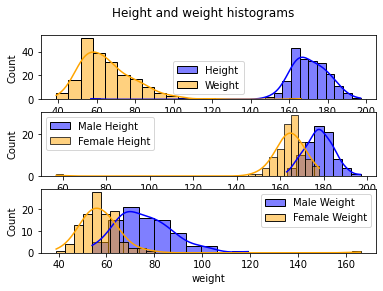

In [33]:
fig, ax = plt.subplots(nrows=3)
sns.histplot(df['height'], kde=True, color='blue', label='Height', ax = ax[0])
sns.histplot(df['weight'], kde=True, color='orange', label='Weight', ax = ax[0])
sns.histplot(df[df['sex'] == 'M']['height'], kde=True, color='blue', label='Male Height', ax = ax[1])
sns.histplot(df[df['sex'] == 'F']['height'], kde=True, color='orange', label='Female Height', ax = ax[1])
sns.histplot(df[df['sex'] == 'M']['weight'], kde=True, color='blue', label='Male Weight', ax = ax[2])
sns.histplot(df[df['sex'] == 'F']['weight'], kde=True, color='orange', label='Female Weight', ax = ax[2])
fig.suptitle('Height and weight histograms')
for axs in ax:
    axs.legend()

In [34]:
train.replace({'M':0, 'F':1}, inplace=True)
test.replace({'M':0, 'F':1}, inplace=True)

C:\Users\fenryux\anaconda3\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [35]:
train.head()

,sex,weight,height,repwt,repht
156,0,69,172,68.0,174.0
54,0,64,177,NaN,NaN
57,0,73,183,74.0,180.0
69,0,80,178,76.0,175.0
161,1,54,161,54.0,160.0


In [36]:
test.head()

,sex,weight,height,repwt,repht
106,1,52,152,51.0,150.0
77,1,63,160,64.0,158.0
153,1,55,162,NaN,NaN
182,0,82,181,NaN,NaN
66,1,64,165,63.0,163.0


In [37]:
X_train = train.loc[:, 'weight':'height'].to_numpy()
y_train = train['sex'].to_numpy()
clf = LogisticRegression().fit(X_train, y_train)
print('Score: ', clf.score(X_train, y_train))

Score:  0.94


In [38]:
X_test = test.loc[:, 'weight':'height'].to_numpy()
y_test = test['sex'].to_numpy()
predictions = clf.predict(X_test)
print('Accuracy_score: ', accuracy_score(predictions, y_test))

Accuracy_score:  0.91


C:\Users\fenryux\AppData\Local\Temp/ipykernel_2132/4089504130.py:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax[0].pcolormesh(xx, yy, Z, cmap=ListedColormap(['orange','blue']), alpha=0.3)
C:\Users\fenryux\AppData\Local\Temp/ipykernel_2132/4089504130.py:29: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax[1].pcolormesh(xx, yy, Z, cmap=ListedColormap(['orange','blue']), alpha=0.3)


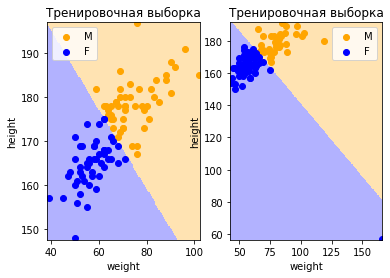

In [39]:
fig, ax = plt.subplots(ncols=2)

x_min, x_max = X_train[:, 0].min() - 0.5,  X_train[:, 0].max() + 0.5
y_min, y_max =  X_train[:, 1].min() - 0.5,  X_train[:, 1].max() + 0.5

h = 0.4
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
ax[0].pcolormesh(xx, yy, Z, cmap=ListedColormap(['orange','blue']), alpha=0.3)

predictions = clf.predict(X_train)

ax[0].scatter(X_train[predictions == 0][:,0], X_train[predictions == 0][:,1], color='orange', label='M')
ax[0].scatter(X_train[predictions == 1][:,0], X_train[predictions == 1][:,1], color='blue', label='F')
ax[0].set_xlabel('weight')
ax[0].set_ylabel('height')
ax[0].set_title('Тренировочная выборка')
ax[0].legend()

x_min, x_max = X_test[:, 0].min() - 0.5,  X_test[:, 0].max() + 0.5
y_min, y_max =  X_test[:, 1].min() - 0.5,  X_test[:, 1].max() + 0.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
ax[1].pcolormesh(xx, yy, Z, cmap=ListedColormap(['orange','blue']), alpha=0.3)

predictions = clf.predict(X_test)
ax[1].scatter(X_test[predictions == 0][:,0], X_test[predictions == 0][:,1], color='orange', label='M')
ax[1].scatter(X_test[predictions == 1][:,0], X_test[predictions == 1][:,1], color='blue', label='F')
ax[1].set_xlabel('weight')
ax[1].set_ylabel('height')
ax[1].set_title('Тренировочная выборка')
ax[1].legend()

# 2.2

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [41]:
df = pd.read_excel('Folds5x2_pp.xlsx', sheet_name='Sheet1')

In [42]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [43]:
validation, test = train_test_split(df, test_size=0.5)

In [44]:
X_validation = validation.loc[:, 'AT':'RH'].to_numpy()
y_validation = validation['PE'].to_numpy()

In [45]:
X_test = test.loc[:, 'AT':'RH'].to_numpy()
y_test = test['PE'].to_numpy()

In [46]:
clf = LinearRegression().fit(X_validation, y_validation)
print('Score: ', lnr.score(X_validation, y_validation))

Score:  0.9258125262688659


In [47]:
predictions = lnr.predict(X_validation)
print('R2 = ', r2_score(predictions, y_validation))
print('MSE = ', mean_squared_error(predictions, y_validation))

R2 =  0.919867714438777
MSE =  21.151004286467575


Text(0, 0.5, 'Оценка')

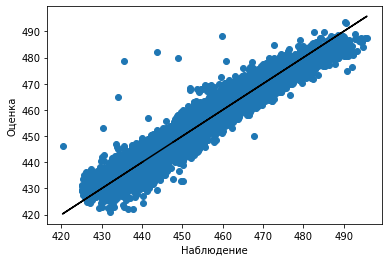

In [48]:
fig, ax = plt.subplots()
ax.scatter(y_validation, predictions)
ax.plot(y_validation,y_validation, color='black')
ax.set_xlabel('Наблюдение')
ax.set_ylabel('Оценка')